<a href="https://colab.research.google.com/github/Sant18/Cali_Analysis/blob/main/California_House_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['housing.csv']))

In [ ]:
df.columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
def check_cols(df):
  cols = [i for i in df.columns]
  uni = [len(df[i].unique()) if len(df[i].unique()) > 10 else df[i].unique() for i in df.columns]
  null = [i for i in df.isnull().sum().values]
  perc = [round((df[i].isnull().sum()/df.shape[0])*100,3) for i in df.columns]
  typ = [df[i].dtype for i in df.columns]

  return pd.DataFrame(zip(cols, uni, null, perc, typ)).rename(columns={0:'Cols', 1:'Uni', 2:'Null', 3:'Null%', 4:'Type'}).sort_values(by='Null', ascending=True)

In [ ]:
check_cols(df)

,Cols,Uni,Null,Null%,Type
0,id,20640,0,0.000,int64
1,longitude,844,0,0.000,float64
2,latitude,862,0,0.000,float64
3,housing_median_age,52,0,0.000,int64
4,total_rooms,5926,0,0.000,int64
6,population,3888,0,0.000,int64
7,households,1815,0,0.000,int64
8,median_income,12928,0,0.000,float64
9,median_house_value,3842,0,0.000,int64
10,ocean_proximity,"[NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND]",0,0.000,object


In [ ]:
pd.DataFrame(round(df['median_house_value'].describe(), 2))

,median_house_value
count,20640.00
mean,206855.82
std,115395.62
min,14999.00
25%,119600.00
50%,179700.00
75%,264725.00
max,500001.00


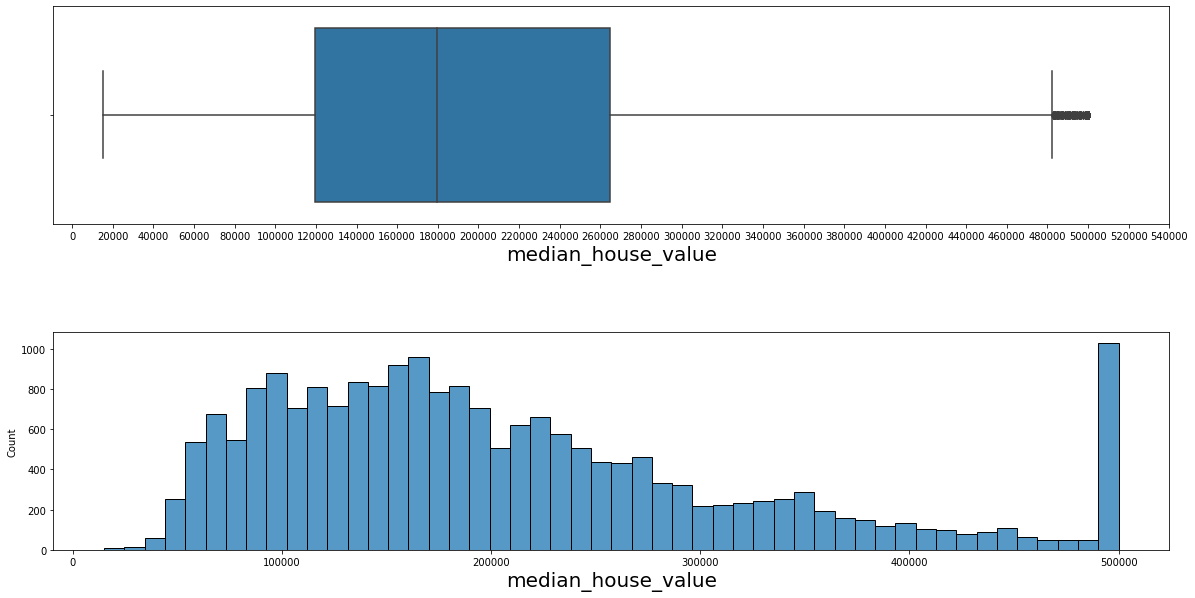

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))#, constrained_layout=False)
plt.subplots_adjust(hspace = 0.5)
#plt.tight_layout()
#plt.subplot_tool()

sns.boxplot(x='median_house_value', data=df, ax=ax[0])
ax[0].set_xlabel('median_house_value', fontsize=20)
ax[0].set_xticks(range(0, 550000, 20000))

sns.histplot(x='median_house_value', data=df, ax=ax[1], bins=50)
ax[1].set_xlabel('median_house_value', fontsize=20)

plt.show()

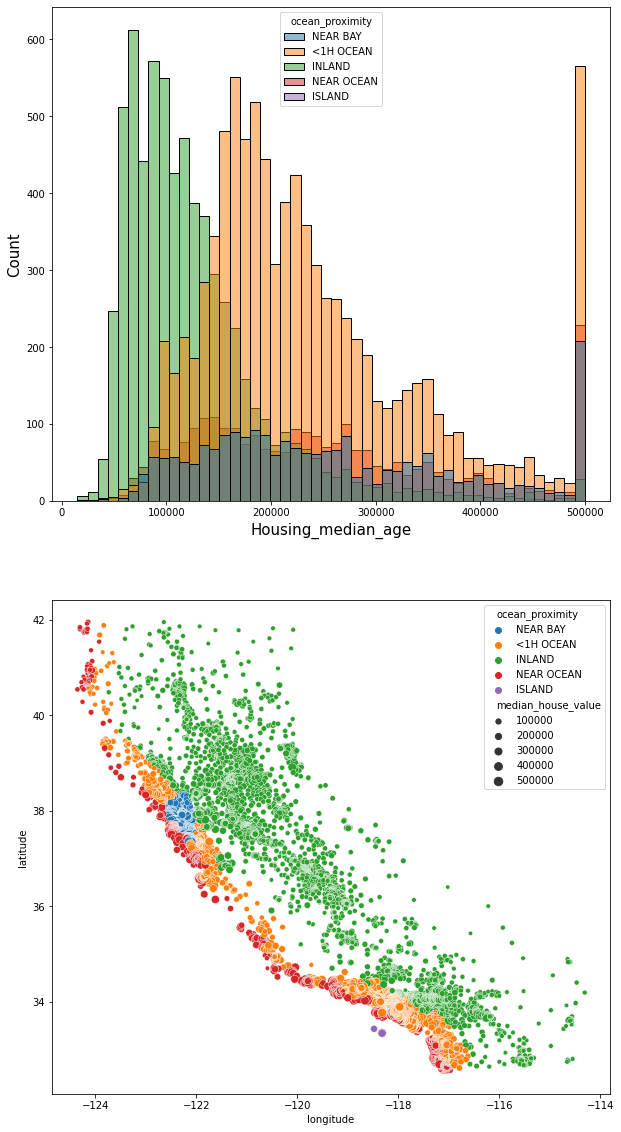

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))

sns.histplot(x='median_house_value', data=df, ax=ax[0], bins=50, hue='ocean_proximity')
#ax[0].set_xticks(range(0, 55, 5))
ax[0].set_xlabel('Housing_median_age', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)

sns.scatterplot(x='longitude', y='latitude', data=df, ax=ax[1], hue='ocean_proximity', size='median_house_value')
plt.show()

In [ ]:
df[df['median_house_value'] > 480000]

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,90,-122.27,37.80,52,249,78.0,396,85,1.2434,500001,NEAR BAY
140,141,-122.18,37.81,30,292,38.0,126,52,6.3624,483300,NEAR BAY
459,460,-122.25,37.87,52,609,236.0,1349,250,1.1696,500001,NEAR BAY
489,490,-122.25,37.86,48,2153,517.0,1656,459,3.0417,489600,NEAR BAY
493,494,-122.24,37.86,52,1668,225.0,517,214,7.8521,500001,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20422,20423,-118.90,34.14,35,1503,263.0,576,216,5.1457,500001,<1H OCEAN
20426,20427,-118.69,34.18,11,1177,138.0,415,119,10.0472,500001,<1H OCEAN
20427,20428,-118.80,34.19,4,15572,2222.0,5495,2152,8.6499,500001,<1H OCEAN
20436,20437,-118.69,34.21,10,3663,409.0,1179,371,12.5420,500001,<1H OCEAN


In [ ]:
#correlation
pd.DataFrame(abs(df.corr()['median_house_value'])).sort_values(by='median_house_value', ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
latitude,0.144160
total_rooms,0.134153
housing_median_age,0.105623
id,0.072086
households,0.065843
total_bedrooms,0.049686
longitude,0.045967
population,0.024650


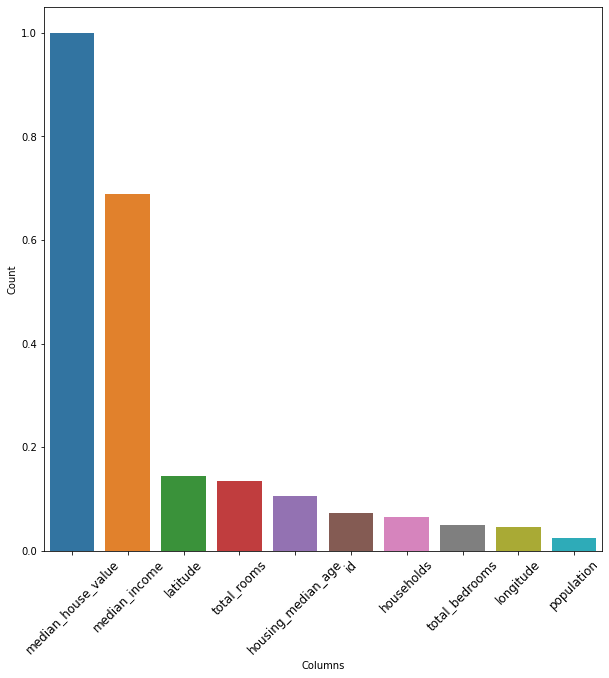

In [ ]:
cor = pd.DataFrame(abs(df.corr()['median_house_value'])).sort_values(by='median_house_value', ascending=False)
ind = cor.index
val = cor.values

val = np.squeeze(val)

df_ = pd.DataFrame(zip(ind, val)).rename(columns={0:'ind', 1:'val'})

fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(x='ind', y='val', data=df_, ax=ax)
ax.set_xticklabels(ind, rotation=45, fontsize=12)
ax.set_xlabel('Columns', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
plt.show()

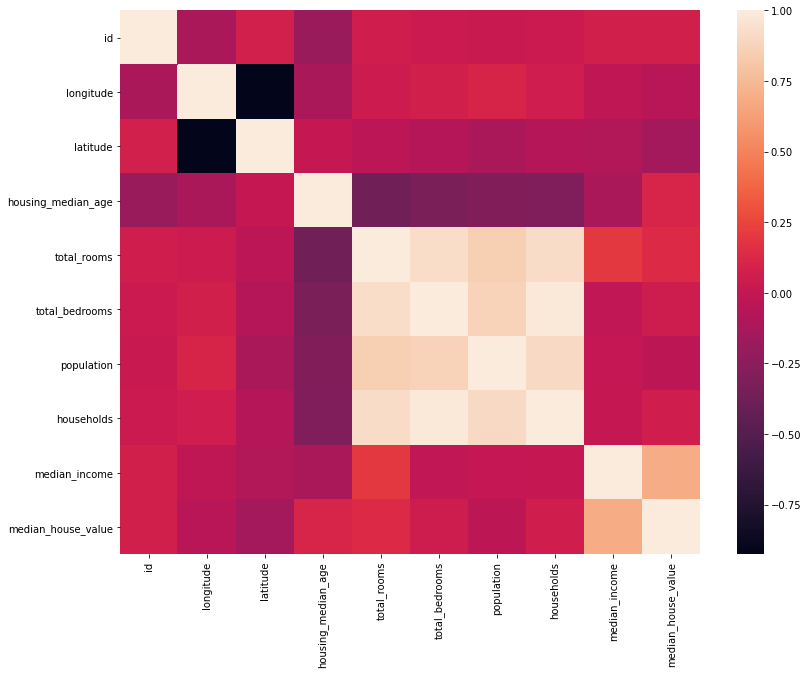

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))

sns.heatmap(df.corr(), ax=ax, data=df)
plt.show()

In [ ]:
df.head(1)

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY


In [ ]:
df['bin_age'] = pd.qcut(df['housing_median_age'], 3, ['low', 'med', 'hig'])

In [ ]:
pd.DataFrame(round(df.groupby(['ocean_proximity', 'bin_age'])['median_house_value'].mean(), 2))

median_house_value
ocean_proximity bin_age                    
<1H OCEAN       low               247221.96
                med               241148.55
                hig               232054.36
INLAND          low               133993.74
                med               114336.23
                hig               118241.27
ISLAND          low                     NaN
                med               368750.00
                hig               388233.33
NEAR BAY        low               247357.43
                med               259944.95
                hig               261951.56
NEAR OCEAN      low               238297.77
                med               249688.95
                hig               260133.21

In [ ]:
df.head()
df.groupby('ocean_proximity')['bin_age'].agg(pd.Series.mode).to_frame()

,bin_age
ocean_proximity,
<1H OCEAN,med
INLAND,"0 low Name: bin_age, dtype: category Catego..."
ISLAND,"0 hig Name: bin_age, dtype: category Catego..."
NEAR BAY,"0 hig Name: bin_age, dtype: category Catego..."
NEAR OCEAN,"0 med Name: bin_age, dtype: category Catego..."


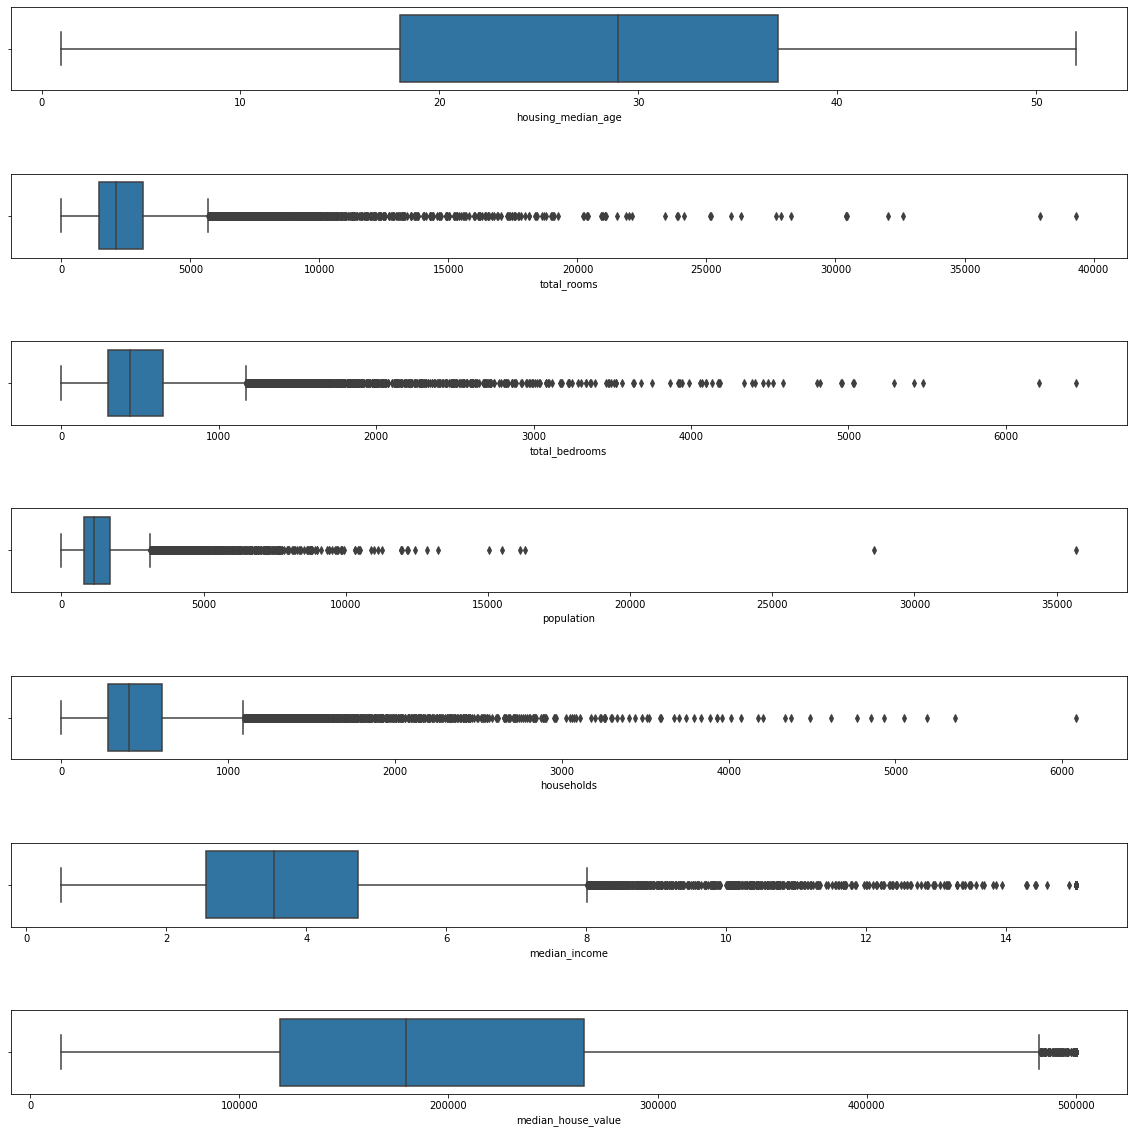

In [ ]:
num = [i for i in df.columns if df[i].dtype != 'object']

df_ = df[num].drop(['id', 'bin_age', 'longitude', 'latitude'], axis=1)

fig, ax = plt.subplots(df_.shape[1], 1, figsize=(20, 20))
plt.subplots_adjust(hspace = 1)

for i in range(df_.shape[1]):
  sns.boxplot(x=df_.columns[i], data=df_, ax=ax[i])

In [ ]:
df.total_rooms.describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

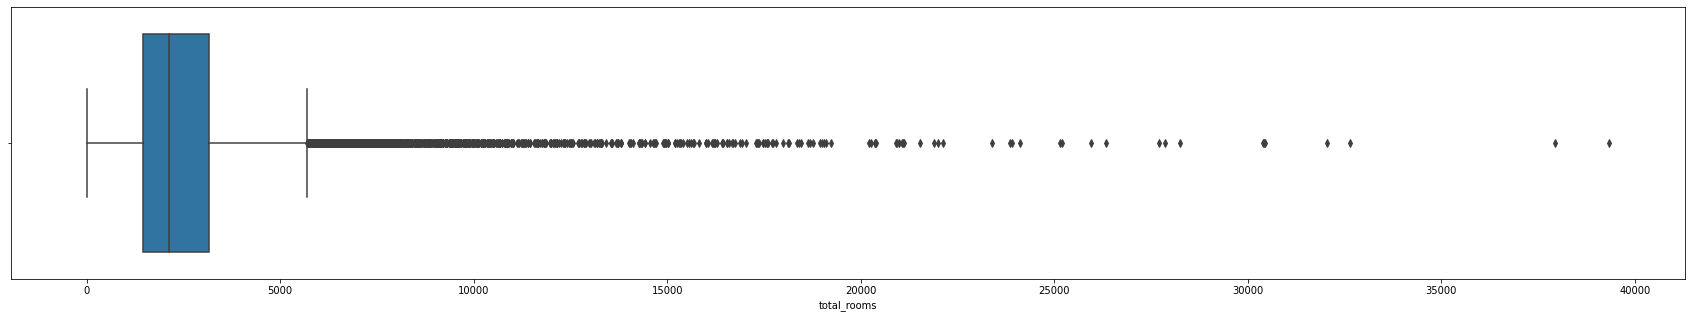

In [ ]:
fig, ax = plt.subplots(figsize=(30, 5))

sns.boxplot(x='total_rooms', data=df, ax=ax)
ax.set_xticks(range(0, 45000, 5000))
plt.show()

In [ ]:
df.shape

(20640, 12)

In [ ]:
print(round((df.loc[df['total_rooms'] < 5700].shape[0]/df.shape[0])*100, 2))
print(round((df.loc[df['total_rooms'] > 5700].shape[0]/df.shape[0])*100, 2))

93.77
6.23


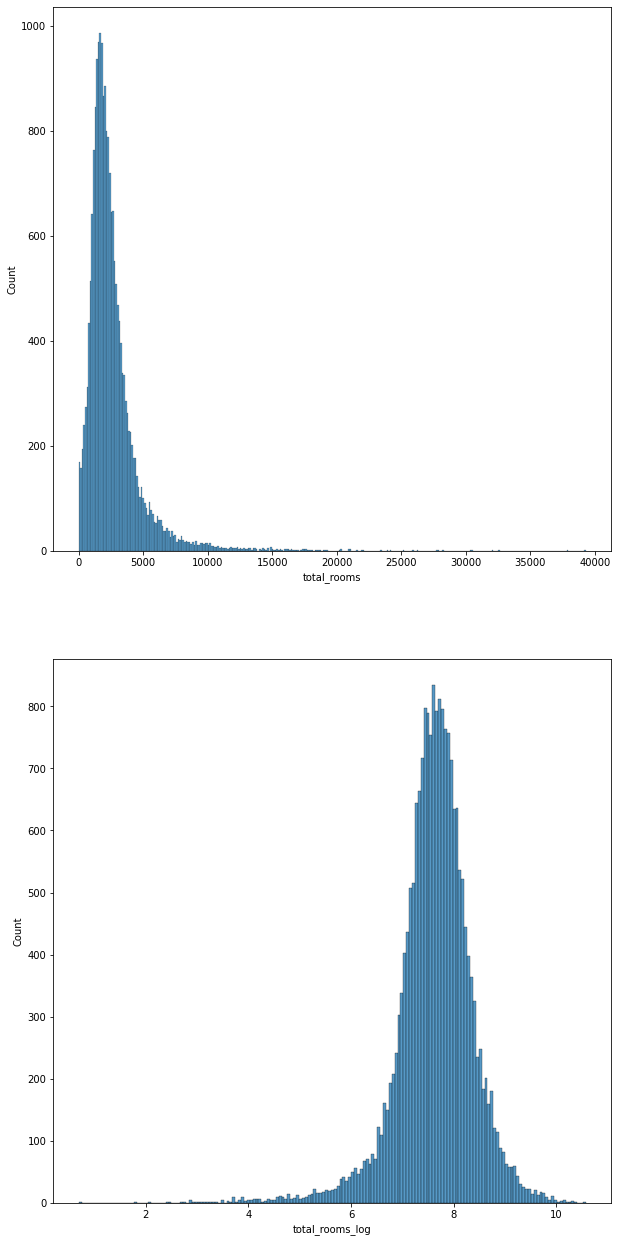

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 22))

sns.histplot(x='total_rooms', data=df, ax=ax[0])
df['total_rooms_log'] = np.log(df['total_rooms'])
sns.histplot(x='total_rooms_log', data=df, ax=ax[1])
plt.show()

In [ ]:
df.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bin_age,total_rooms_log
0,1,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,hig,6.779922
1,2,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,low,8.867709
2,3,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,hig,7.290975
3,4,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,hig,7.149917
4,5,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,hig,7.394493


In [ ]:
df.groupby('bin_age')['total_rooms'].mean()

bin_age
low    3573.811712
med    2435.547360
hig    1806.215952
Name: total_rooms, dtype: float64

In [ ]:
df.median_house_value.describe()
df['house_bin'] = pd.qcut(df['median_house_value'], 3, ['low', 'med', 'hig'])

In [ ]:
df[['median_house_value', 'house_bin']]

,median_house_value,house_bin
0,452600,hig
1,358500,hig
2,352100,hig
3,341300,hig
4,342200,hig
...,...,...
20635,78100,low
20636,77100,low
20637,92300,low
20638,84700,low


In [ ]:
df.groupby('ocean_proximity')['house_bin'].agg(pd.Series.mode).to_frame()

,house_bin
ocean_proximity,
<1H OCEAN,med
INLAND,"0 low Name: house_bin, dtype: category Cate..."
ISLAND,"0 hig Name: house_bin, dtype: category Cate..."
NEAR BAY,"0 hig Name: house_bin, dtype: category Cate..."
NEAR OCEAN,"0 hig Name: house_bin, dtype: category Cate..."


In [ ]:
df.groupby(['ocean_proximity', 'house_bin'])['median_income'].mean().to_frame()

median_income
ocean_proximity house_bin               
<1H OCEAN       low             2.405746
                med             3.573897
                hig             5.477790
INLAND          low             2.699341
                med             4.092108
                hig             5.629462
ISLAND          low                  NaN
                med                  NaN
                hig             2.744420
NEAR BAY        low             2.405583
                med             3.536701
                hig             5.171277
NEAR OCEAN      low             2.499899
                med             3.305420
                hig             5.059336

In [ ]:
abs(df.corr()) >0.95

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_log
id,True,False,False,False,False,False,False,False,False,False,False
longitude,False,True,False,False,False,False,False,False,False,False,False
latitude,False,False,True,False,False,False,False,False,False,False,False
housing_median_age,False,False,False,True,False,False,False,False,False,False,False
total_rooms,False,False,False,False,True,False,False,False,False,False,False
total_bedrooms,False,False,False,False,False,True,False,True,False,False,False
population,False,False,False,False,False,False,True,False,False,False,False
households,False,False,False,False,False,True,False,True,False,False,False
median_income,False,False,False,False,False,False,False,False,True,False,False
median_house_value,False,False,False,False,False,False,False,False,False,True,False


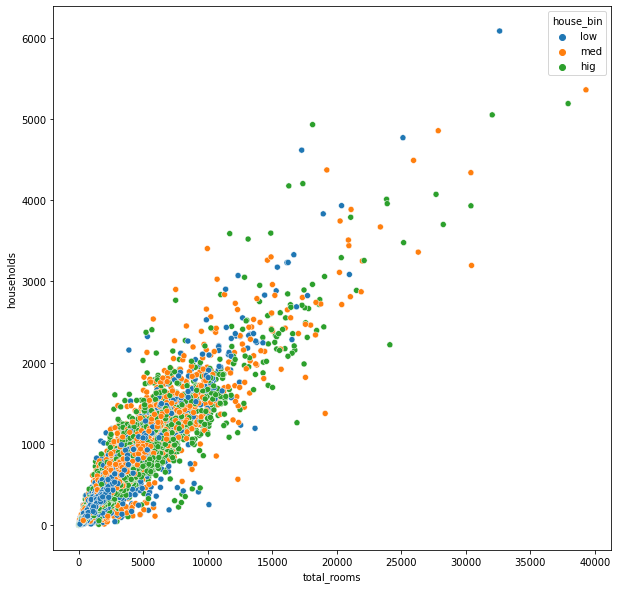

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='total_rooms', y='households', data=df, ax=ax, hue='house_bin')
plt.show()

In [ ]:
df.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bin_age,total_rooms_log,house_bin
0,1,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,hig,6.779922,hig
1,2,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,low,8.867709,hig
2,3,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,hig,7.290975,hig
3,4,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,hig,7.149917,hig
4,5,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,hig,7.394493,hig


In [ ]:
def add_year(x):
  if (x is not np.nan and x is not None):
    return (2021 - x)

In [ ]:
df['year_built'] = df['housing_median_age'].apply(add_year)

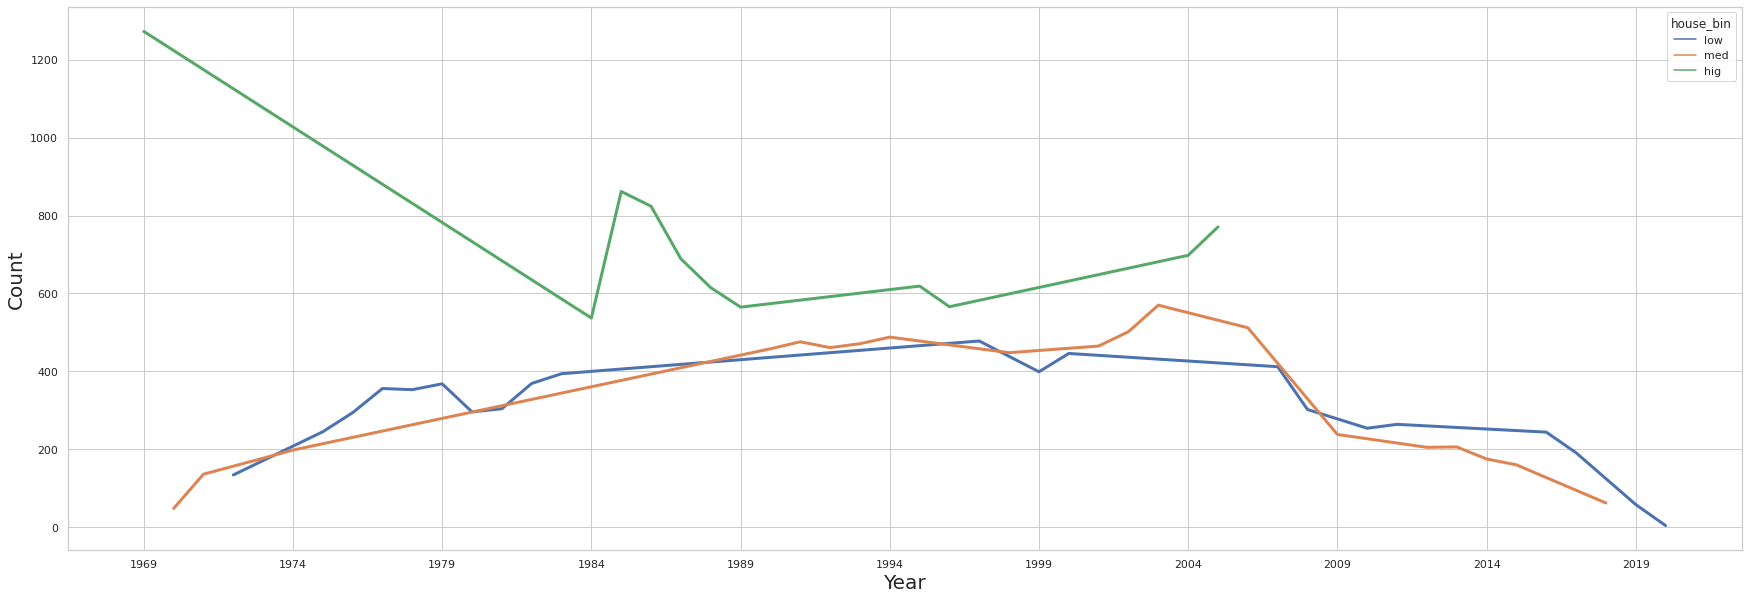

In [ ]:
sns.set(style="whitegrid")

ind = df['year_built'].value_counts().to_frame().index
val = df['year_built'].value_counts().to_frame().values

val = np.squeeze(val)

df_ = pd.DataFrame(zip(ind, val)).rename(columns={0:'ind', 1:'val'})
df_ = df_.sort_values(by='ind')

year = list(range(1969, 2021, 5))

df_ = pd.concat([df_, df['house_bin']], axis=1)

fig, ax = plt.subplots(figsize=(30, 10))

sns.lineplot(x='ind', y='val', data=df_, linewidth=3, color='red', ax=ax, hue='house_bin')
ax.set_xticks(year)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
plt.show()

In [ ]:
def add_era(x):

  if (x is np.nan or x is None):
    return np.nan
  elif str(x)[2] == '6':
    return '1960s'
  elif str(x)[2] == '7':
    return '1970s'
  elif str(x)[2] == '8':
    return '1980s'
  elif str(x)[2] == '9':
    return '1990s'
  elif str(x)[2] == '0':
    return '2000s'
  elif str(x)[2] == '1':
    return '2010s'
  elif str(x)[2] == '2':
    return '2020s'
  else:
    return 'Check'


In [ ]:
df['Era'] = df['year_built'].apply(add_era)

In [ ]:
df['Era'].value_counts()

1980s    5455
2000s    4916
1990s    4864
1970s    2309
2010s    1819
1960s    1273
2020s       4
Name: Era, dtype: int64

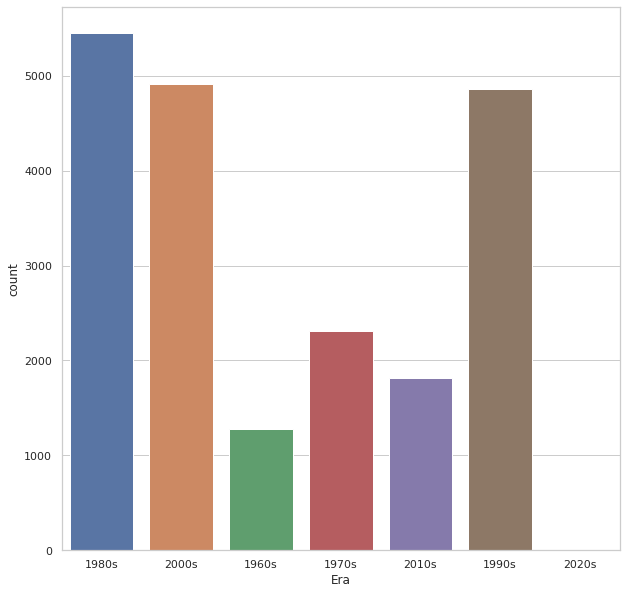

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.countplot(x='Era', data=df, ax=ax)

Text(0, 0.5, 'Count')

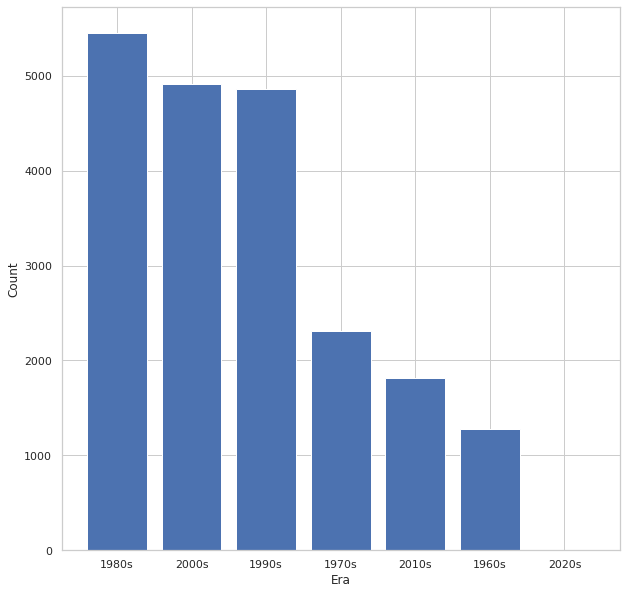

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ind = df['Era'].value_counts().index
val = df['Era'].value_counts().values

ax.bar(ind, val)
ax.set_xlabel('Era')
ax.set_ylabel('Count')

In [ ]:
pd.DataFrame(round(df.groupby('Era')['housing_median_age'].mean()))

,housing_median_age
Era,
1960s,52.0
1970s,45.0
1980s,36.0
1990s,27.0
2000s,17.0
2010s,7.0
2020s,1.0


In [ ]:
pd.DataFrame(round(df.groupby('Era')['median_house_value'].mean()))

,median_house_value
Era,
1960s,275421.0
1970s,207418.0
1980s,206116.0
1990s,207438.0
2000s,192578.0
2010s,197544.0
2020s,144300.0


In [ ]:
df.columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'bin_age', 'total_rooms_log',
       'house_bin', 'year_built', 'Era'],
      dtype='object')

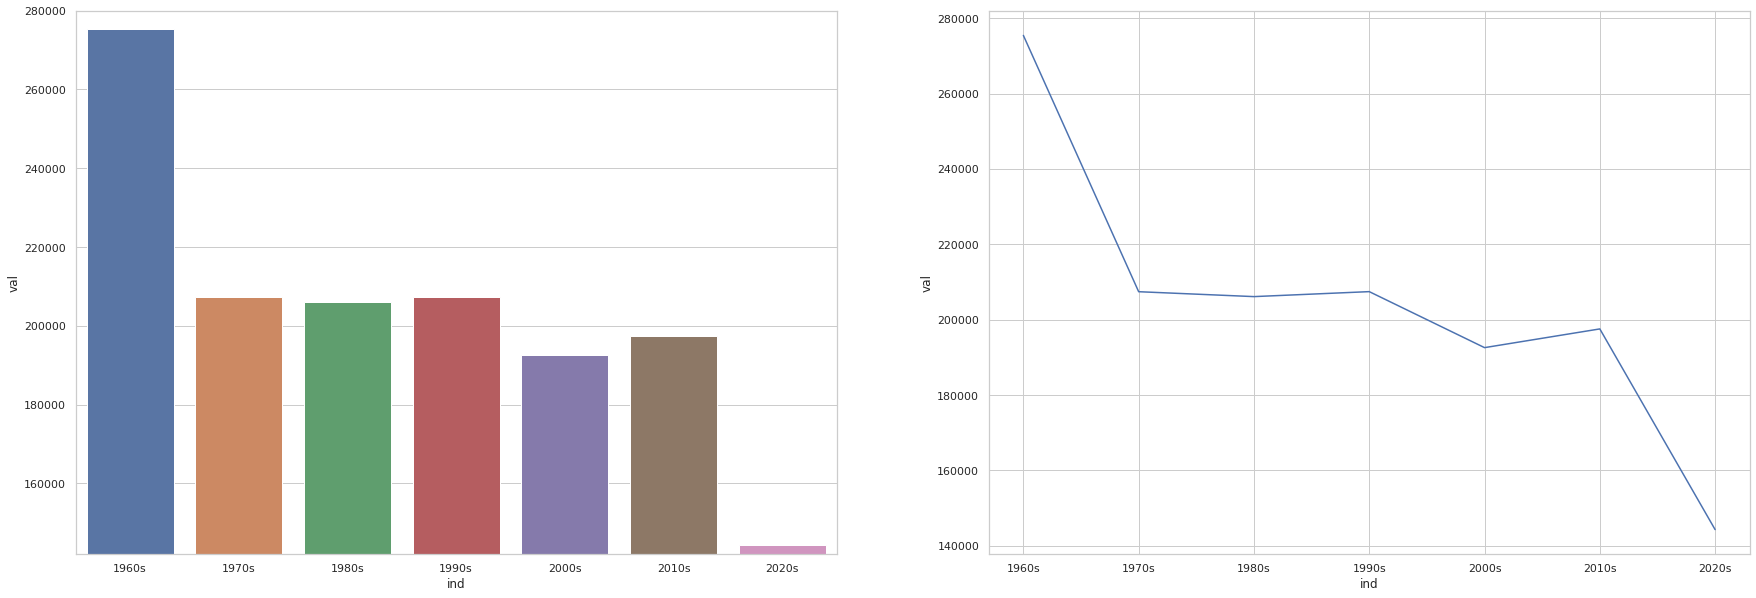

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

i = df.groupby('Era')['median_house_value'].mean().index
v = df.groupby('Era')['median_house_value'].mean().values

v = np.squeeze(v)

df_ = pd.DataFrame(zip(i, v)).rename(columns={0:'ind', 1:'val'}).sort_values(by='ind')

sns.barplot(x='ind', y='val', data=df_, ax=ax[0])
#ax[0].set_yticks(range(150000, 250000, 50000))
ax[0].set_ylim(142000, 280000)
sns.lineplot(x='ind', y='val', data=df_, ax=ax[1])

plt.show()

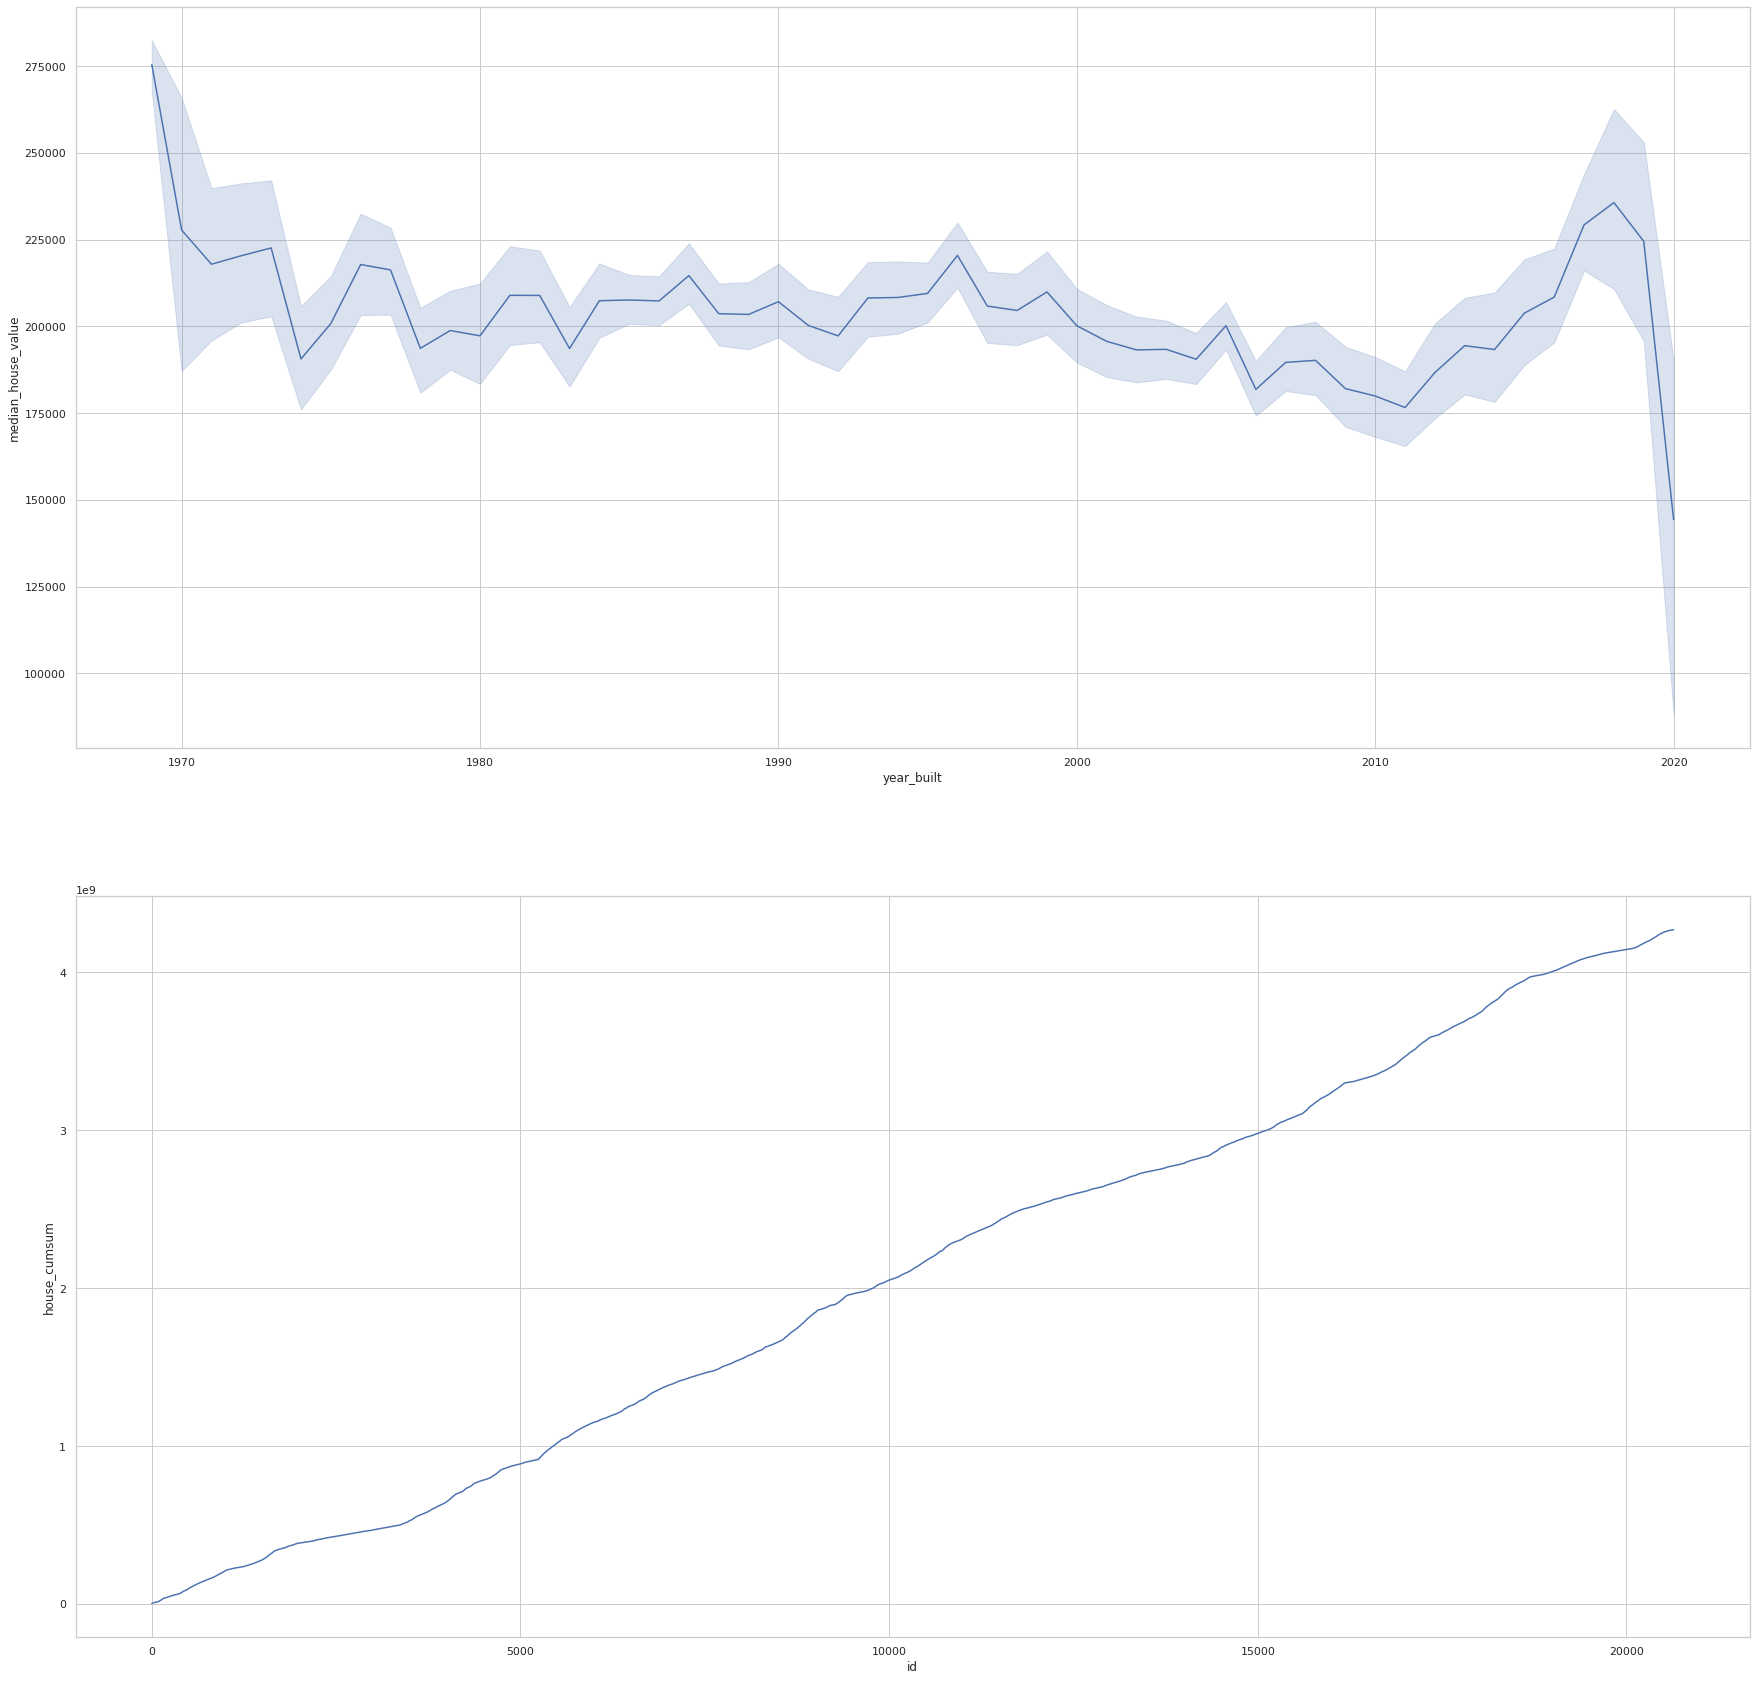

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(30, 30))

df_ = df.sort_values(by='year_built')

df_['house_cumsum'] = df['median_house_value'].cumsum()

#sns.lineplot(x='id', y='housing_median_age', data=df_, ax=ax[0])
sns.lineplot(x='year_built', y='median_house_value', data=df_, ax=ax[0])
sns.lineplot(x='id', y='house_cumsum', data=df_, ax=ax[1])

plt.show()

In [ ]:
df.columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'bin_age', 'total_rooms_log',
       'house_bin', 'year_built', 'Era'],
      dtype='object')

In [ ]:
df['income'] = df.median_income*10000

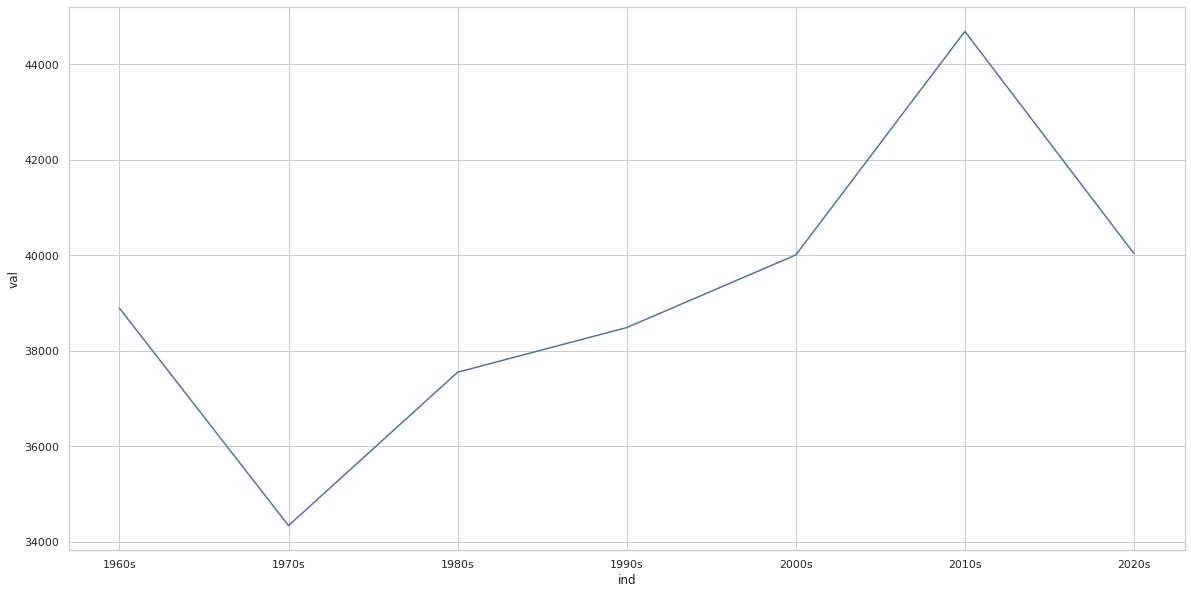

In [ ]:
ind = df.groupby(['Era'])['income'].mean().index
val = df.groupby(['Era'])['income'].mean().values

df_ = pd.DataFrame(zip(ind, val)).rename(columns={0:'ind', 1:'val'})

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='ind', y='val', data=df_, ax=ax)
plt.show()

In [ ]:
df.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bin_age,total_rooms_log,house_bin,year_built,Era,income
0,1,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,hig,6.779922,hig,1980,1980s,83252.0
1,2,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,low,8.867709,hig,2000,2000s,83014.0
2,3,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,hig,7.290975,hig,1969,1960s,72574.0
3,4,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,hig,7.149917,hig,1969,1960s,56431.0
4,5,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,hig,7.394493,hig,1969,1960s,38462.0


In [ ]:
df[df['Era'] == '1990s'][df['median_house_value'] > 350000][df['income'] > 90000][df['income'] < 110000].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(69, 17)

In [ ]:
#df.loc[(df['total_rooms'] < 1000 and df['total_rooms'] > 800)]

In [ ]:
df.groupby(['Era', 'bin_age'])['income'].mean().to_frame().fillna('n/a')

income
Era   bin_age         
1960s low          n/a
      med          n/a
      hig      38890.5
1970s low          n/a
      med          n/a
      hig        34337
1980s low          n/a
      med      38849.4
      hig      36280.3
1990s low      39226.5
      med      38416.9
      hig          n/a
2000s low      40004.3
      med          n/a
      hig          n/a
2010s low      44685.7
      med          n/a
      hig          n/a
2020s low        40034
      med          n/a
      hig          n/a

In [ ]:
df[df['Era'] == '1960s'][df['bin_age'] == 'low']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bin_age,total_rooms_log,house_bin,year_built,Era,income


In [ ]:
num = [i for i in df.columns if df[i].dtype != 'object']

In [ ]:
num.remove('id')
num.remove('longitude')
num.remove('latitude')
num.remove('bin_age')
num.remove('year_built')

In [ ]:
num.remove('total_rooms_log')

In [ ]:
num.remove('house_bin')

In [ ]:
df = df.dropna()

In [ ]:
for i in num:
  q1 = np.percentile(df[i], 25)
  q3 = np.percentile(df[i], 75)
  iqr = q3 - q1
  low = iqr - 3*q1
  hig = iqr + 3*q3
  l = df.loc[df[i] < low, i]
  h = df.loc[df[i] > hig, i]

  print(i)
  print(l)
  print(h)

housing_median_age
housing_median_age
Series([], Name: housing_median_age, dtype: int64)
Series([], Name: housing_median_age, dtype: int64)
total_rooms
total_rooms
Series([], Name: total_rooms, dtype: int64)
283      12842
570      18634
576      14316
864      16199
865      14917
         ...  
20427    15572
20440    16222
20451    25187
20530    15018
20563    12139
Name: total_rooms, Length: 208, dtype: int64
total_bedrooms
total_bedrooms
Series([], Name: total_bedrooms, dtype: float64)
95       2477.0
508      2408.0
570      2885.0
864      2993.0
865      2708.0
          ...  
20424    2704.0
20440    2309.0
20451    3521.0
20530    3008.0
20563    2640.0
Name: total_bedrooms, Length: 186, dtype: float64
population
population
Series([], Name: population, dtype: int64)
570       7427
864       8117
865       8012
871       7205
922      12203
         ...  
20451    11956
20530     7984
20544     6330
20563     6837
20629     6912
Name: population, Length: 181, dtype: int64
hou

In [ ]:
df[num]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,house_bin,income
0,41,880,129.0,322,126,8.3252,452600,hig,83252.0
1,21,7099,1106.0,2401,1138,8.3014,358500,hig,83014.0
2,52,1467,190.0,496,177,7.2574,352100,hig,72574.0
3,52,1274,235.0,558,219,5.6431,341300,hig,56431.0
4,52,1627,280.0,565,259,3.8462,342200,hig,38462.0
...,...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,78100,low,15603.0
20636,18,697,150.0,356,114,2.5568,77100,low,25568.0
20637,17,2254,485.0,1007,433,1.7000,92300,low,17000.0
20638,18,1860,409.0,741,349,1.8672,84700,low,18672.0
